--- 
# Part 1: Overview, Data Cleaning & EDA

This notebook gives an overview of the project, data cleaning and quality control of each of the 3 datasets, and initial exporatory data analysis (EDA).

--- 

# Problem Statement

Conducting analysis on your customer base and sending personalized campaigns to high value targets has massive benefits in any industry. Using unsupervised learning, I will seek to implement cluster analysis for customer segmentation and targeted marketing outreach.

# Contents

- [Overview](#Overview)
- [References](#References)
- [Data Import & Cleaning](#Data-Import-&-Cleaning)
    - [Portfolio Dataset](#Portfolio-Dataset)
    - [Profile Dataset](#Profile-Dataset)
    - [Transcript Dataset](#Transcript-Dataset)
- [More EDA](#More-EDA)

# Overview

Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately. The goal is to maximize the value of each customer to the business. In business-to-consumer marketing, companies like Starbucks often segment customers according to demographics that include:

- Age
- Gender
- Location (urban, suburban, rural)
- Products previously purchased from the company
- Other demographics like life stage (single, married, divorced, empty-nester, retired, etc.)

For this project I used [Starbucks customer data](https://www.kaggle.com/ihormuliar/starbucks-customer-data) that includes transactions, demographics and promotional offer data from their rewards program. Companies often do this type of deep dive customer segmentation analysis in order to better understand the purchasing habits of their customers and be able to target specific promotional deals. The dataset includes 306,534 events related to 17,000 customers and 10 event types over the course of a 30-days. One of the main tasks of this project is to synthesize these three different datasets for customer segmentation analysis and a deep dive into each cluster for business insights and recommendations.

Why segment customers?
- Create and communicate targeted marketing messages that will resonate with specific groups of customers, but not with others (who will receive messages tailored to their needs and interests, instead).
- Select the best communication channel for the segment, which might be email, social media posts, radio advertising, or another approach, depending on the segment. 
- Identify ways to improve products or new product or service opportunities.
- Establish better customer relationships.
- Test pricing options.
- Focus on the most profitable customers.
- Improve customer service.
- Upsell and cross-sell other products and services.

So what are the different types of customers that Starbucks has? Do people react to different discount promotions? Can Starbucks make more money on promotions if they cluster their customers appropriately? My analysis of Starbucks customers will answer what type of people make purchases at their stores and what promotional offers are most appropriate for the cluster they belong to.


Begin with an executive summary:

What is your goal?
What are your metrics?
What were your findings?
What risks/limitations/assumptions affect these findings?
Summarize your statistical analysis, including:

implementation
evaluation
inference

**Workflow:**

1. EDA
2. Data Wrangling
3. Merge and Synthesize Cleaned Datasets
4. Calculate RMF Metrics and Conversion Rates from Offer to Transaction
5. Feature Scaling: StandardScaler
6. Dimensionality Reduction: PCA
7. Cluster Analysis: K-Means and DBSCAN
9. Post Hoc Analysis - Business Insights
10. Conclusions & Recommendations


# References

1. Data Source: https://www.kaggle.com/ihormuliar/starbucks-customer-data
2. https://seifip.medium.com/starbucks-offers-advanced-customer-segmentation-with-python-737f22e245a4
3. https://www.barilliance.com/rfm-analysis/
4. https://formation.ai/blog/how-starbucks-became-1-in-customer-loyalty/
5. https://lifetimes.readthedocs.io/en/latest/
6. https://www.natasshaselvaraj.com/customer-segmentation-with-python/
7. https://towardsdatascience.com/find-your-best-customers-with-customer-segmentation-in-python-61d602f9eee6
8. https://www.datacamp.com/community/tutorials/introduction-customer-segmentation-python
9. https://clevertap.com/blog/rfm-analysis/


# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import calendar
import ast
    
pd.set_option('display.max_rows', None)
sns.set_palette('Greens_r')

# Data Import & Cleaning

In [2]:
transcript = pd.read_csv('./data/transcript.csv')
portfolio = pd.read_csv('./data/portfolio.csv')
profile = pd.read_csv('./data/profile.csv')

transcript.head()

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [3]:
portfolio.head()

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [4]:
profile.head()

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [5]:
# Drop Unnamed index column
transcript.drop(columns = ['Unnamed: 0'], inplace = True)
portfolio.drop(columns = ['Unnamed: 0'], inplace = True)
profile.drop(columns = ['Unnamed: 0'], inplace = True)
profile.head()

,gender,age,id,became_member_on,income
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [6]:
transcript.shape, portfolio.shape, profile.shape

((306534, 4), (10, 6), (17000, 5))

# Portfolio Dataset

Contains 10 different promotional offers and information about each one including the promotional offer type, difficulty rating to achieve the promotion, duration of the offer, reward, and how the promotion was distributed to customers (channels).

In [7]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [8]:
portfolio.describe()

,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


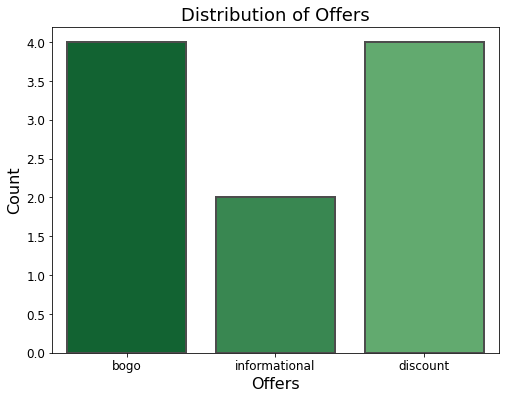

In [9]:
plt.figure(figsize = (8,6))
sns.countplot(data = portfolio, x = 'offer_type', edgecolor=".3", linewidth=2)
plt.title('Distribution of Offers', size = 18)
plt.ylabel('Count', size = 16)
plt.xlabel('Offers', size = 16)
plt.xticks(size = 12)
plt.yticks(size = 12);

Majority discount and bogo offers.

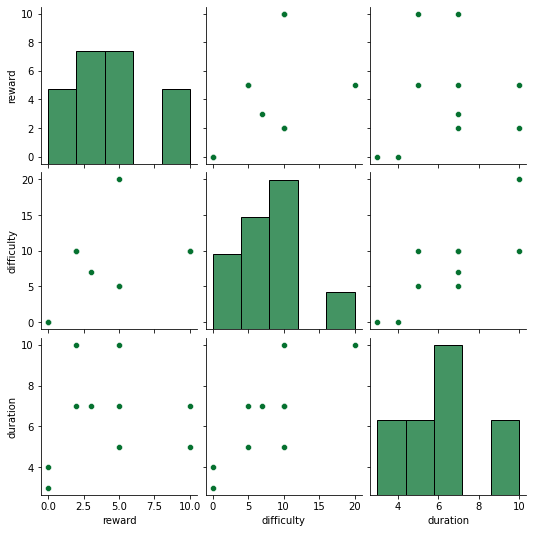

In [10]:
sns.pairplot(portfolio);

In [11]:
# Clarifying 'id' since we have customer_id and offer_id 
portfolio.rename(columns={'id': 'offer_id'}, inplace=True)
portfolio.head()

,reward,channels,difficulty,duration,offer_type,offer_id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [12]:
portfolio['channels'].value_counts()

['web', 'email', 'mobile', 'social']    4
['web', 'email', 'mobile']              3
['email', 'mobile', 'social']           2
['web', 'email']                        1
Name: channels, dtype: int64

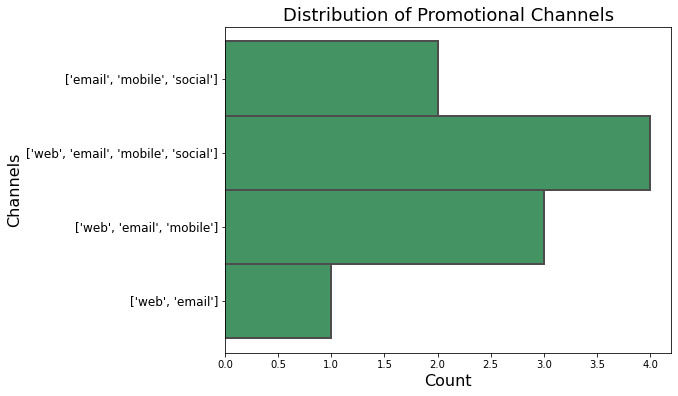

In [13]:
plt.figure(figsize = (8,6))
sns.histplot(portfolio, y = 'channels', edgecolor=".3", linewidth=2)
plt.title('Distribution of Promotional Channels', size = 18)
plt.ylabel('Channels', size = 16)
plt.xlabel('Count', size = 16)
plt.yticks(size = 12);

Most offers use all 4 channel types for promotion.

In [14]:
# Unnesting the channels column and giving it a binary value if the offer contains that channel
def email(portfolio):
    if 'email' in portfolio['channels']:
        val = 1
    else:
        val = 0
    return val

def mobile(portfolio):
    if 'mobile' in portfolio['channels']:
        val = 1
    else:
        val = 0
    return val

def web(portfolio):
    if 'web' in portfolio['channels']:
        val = 1
    else:
        val = 0
    return val

def social(portfolio):
    if 'social' in portfolio['channels']:
        val = 1
    else:
        val = 0
    return val

portfolio['email'] = portfolio.apply(email, axis=1)
portfolio['mobile'] = portfolio.apply(mobile, axis=1)
portfolio['web'] = portfolio.apply(web, axis=1)
portfolio['social'] = portfolio.apply(social, axis=1)
portfolio.head(10)

,reward,channels,difficulty,duration,offer_type,offer_id,email,mobile,web,social
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,0,1
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,1,0
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,1,0
5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1
6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1
7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,0,1
8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1
9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,1,0


In [15]:
# One-hot encode 'offer_type' column
portfolio = pd.get_dummies(portfolio , columns=['offer_type'])
portfolio.rename(columns={'offer_type_bogo': 'bogo', 'offer_type_discount': 'discount', 'offer_type_informational':'informational'}, inplace = True)
portfolio.head()

,reward,channels,difficulty,duration,offer_id,email,mobile,web,social,bogo,discount,informational
0,10,"['email', 'mobile', 'social']",10,7,ae264e3637204a6fb9bb56bc8210ddfd,1,1,0,1,1,0,0
1,10,"['web', 'email', 'mobile', 'social']",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,1,0,0
2,0,"['web', 'email', 'mobile']",0,4,3f207df678b143eea3cee63160fa8bed,1,1,1,0,0,0,1
3,5,"['web', 'email', 'mobile']",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0,1,0,0
4,5,"['web', 'email']",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,1,0,0,1,0


In [16]:
portfolio['offer_id'].unique()

array(['ae264e3637204a6fb9bb56bc8210ddfd',
       '4d5c57ea9a6940dd891ad53e9dbe8da0',
       '3f207df678b143eea3cee63160fa8bed',
       '9b98b8c7a33c4b65b9aebfe6a799e6d9',
       '0b1e1539f2cc45b7b9fa7c272da2e1d7',
       '2298d6c36e964ae4a3e7e9706d1fb8c2',
       'fafdcd668e3743c1bb461111dcafc2a4',
       '5a8bc65990b245e5a138643cd4eb9837',
       'f19421c1d4aa40978ebb69ca19b0e20d',
       '2906b810c7d4411798c6938adc9daaa5'], dtype=object)

In [17]:
portfolio['offer_id'] = portfolio['offer_id'].replace({'ae264e3637204a6fb9bb56bc8210ddfd': 1, 
                                                               '4d5c57ea9a6940dd891ad53e9dbe8da0': 2,
                                                               '3f207df678b143eea3cee63160fa8bed': 3,
                                                               '9b98b8c7a33c4b65b9aebfe6a799e6d9': 4,
                                                               '0b1e1539f2cc45b7b9fa7c272da2e1d7': 5,
                                                               '2298d6c36e964ae4a3e7e9706d1fb8c2': 6,
                                                               'fafdcd668e3743c1bb461111dcafc2a4': 7,
                                                               '5a8bc65990b245e5a138643cd4eb9837': 8,
                                                               'f19421c1d4aa40978ebb69ca19b0e20d': 9,
                                                               '2906b810c7d4411798c6938adc9daaa5': 10})
portfolio['offer_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [18]:
final_portfolio = portfolio.drop(columns = ['channels'
                                           ])

final_portfolio.head()

,reward,difficulty,duration,offer_id,email,mobile,web,social,bogo,discount,informational
0,10,10,7,1,1,1,0,1,1,0,0
1,10,10,5,2,1,1,1,1,1,0,0
2,0,0,4,3,1,1,1,0,0,0,1
3,5,5,7,4,1,1,1,0,1,0,0
4,5,20,10,5,1,0,1,0,0,1,0


In [19]:
final_portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   reward         10 non-null     int64
 1   difficulty     10 non-null     int64
 2   duration       10 non-null     int64
 3   offer_id       10 non-null     int64
 4   email          10 non-null     int64
 5   mobile         10 non-null     int64
 6   web            10 non-null     int64
 7   social         10 non-null     int64
 8   bogo           10 non-null     uint8
 9   discount       10 non-null     uint8
 10  informational  10 non-null     uint8
dtypes: int64(8), uint8(3)
memory usage: 798.0 bytes


**Observations:**
- channels and offer_type need to be one hot encoded
- portfolio['id'] == 'offer_id' in transcript['value'] so I renamed 'id' to 'offer_id'
- instead of the string of characters for offer_id I created a column that has a more interpretable offer name like offer_1, offer_2 etc
- unnested the list in channels

# Profile Dataset

17,000 records where each row represents a customer, their gender, age, income, and when they became member of the rewards program.

In [20]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [21]:
# Convert dates from int to datetime
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')

profile.dtypes

gender                      object
age                          int64
id                          object
became_member_on    datetime64[ns]
income                     float64
dtype: object

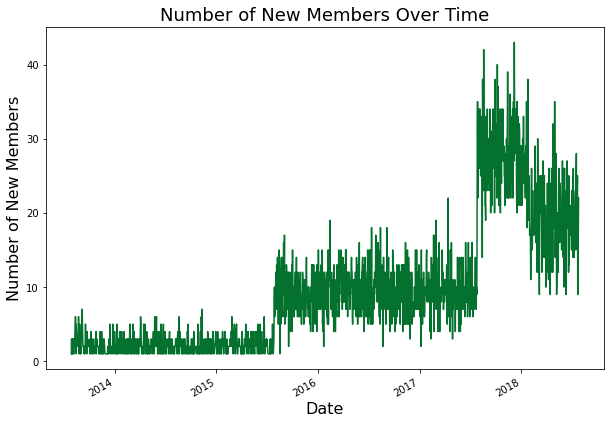

In [22]:
# Number of sign ups each day
profile['became_member_on'].value_counts().plot(kind = 'line', figsize = (10,7))
plt.xlabel('Date', size = 16)
plt.ylabel('Number of New Members', size = 16)
plt.title('Number of New Members Over Time', size =18)
plt.savefig('./images/membership_timeseries.png');

Two big jumps in membership signups, a little over halfway through 2015 and 2017 respectivly. 

In [23]:
# First date membership sign up in the dataset
profile['became_member_on'].min()

Timestamp('2013-07-29 00:00:00')

In [24]:
# Last date membership sign up in the dataset
profile['became_member_on'].max()

Timestamp('2018-07-26 00:00:00')

In [25]:
# Breaking up the date from became_member_on to be able to use for EDA & clustering
# Split out into year, month and day, and calculate total membership_days using today
profile['year'] = profile['became_member_on'].dt.year
profile['month'] = profile['became_member_on'].dt.month
profile['day']=profile['became_member_on'].dt.day_name()

#Use last date of dataset to calculate membership_days and added 1 day so that signup date starts from 1 day
profile['membership_days'] = (profile['became_member_on'].max() - profile['became_member_on']).astype('timedelta64[D]').astype(int) + 1

# Drop 'became_member_on'
profile.drop(columns='became_member_on', inplace=True)

profile.head(3)

,gender,age,id,income,year,month,day,membership_days
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,NaN,2017,2,Sunday,530
1,F,55,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,7,Saturday,377
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,NaN,2018,7,Thursday,15


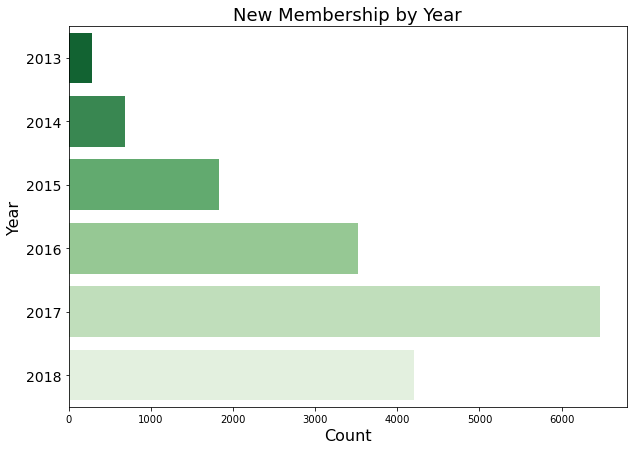

In [26]:
plt.figure(figsize=(10,7))
ax = sns.countplot(y="year", data=profile)
plt.title('New Membership by Year', size = 18)
plt.xlabel('Count', size = 16)
plt.yticks(size = 14)
plt.ylabel('Year', size = 16)
plt.savefig('./images/membership_freq.png');

2017 at first glance had more membership sign ups for the rewards program than in 2018.

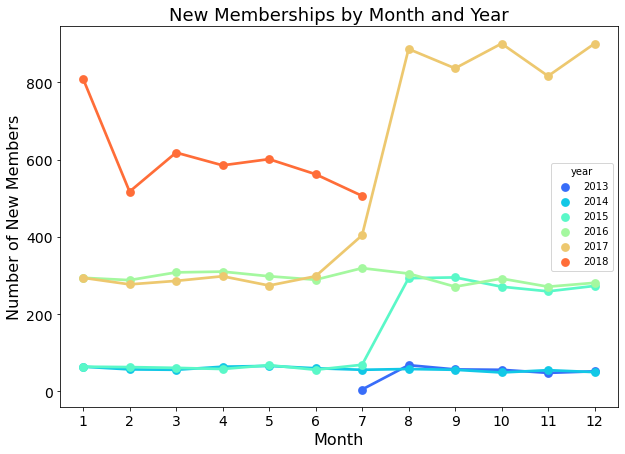

In [27]:
membership_subs = profile[profile['year']>= 2013].groupby(['year','month'], as_index=False).agg({'id':'count'})
plt.figure(figsize=(10,7))
sns.pointplot(x="month", y="id", hue="year", data = membership_subs, palette = 'rainbow')
plt.ylabel('Number of New Members', size = 16)
plt.xlabel('Month', size = 16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.title('New Memberships by Month and Year', size = 18)
plt.savefig('./images/membership_month_year.png');

Data for 2018 & 2013 aren't a full year which is why 2018 might be lower than total new memberships for 2017.

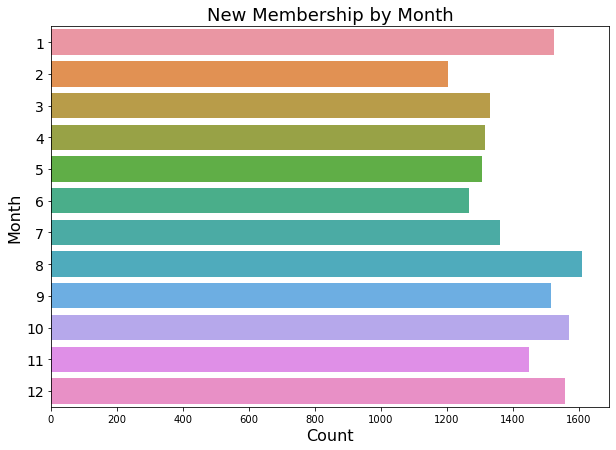

In [28]:
plt.figure(figsize=(10,7))
ax = sns.countplot(y = profile['month'])
plt.title('New Membership by Month', size = 18)
plt.xlabel('Count', size = 16)
plt.yticks(size = 14)
plt.ylabel('Month', size = 16)
plt.savefig('./images/membership_month.png');

August had the most new membership sign ups.

In [29]:
# Impute NaN genders with 'Blank' 
# Not filling with 'O' (other) group as it could represent gender nonbinary 
# which is not the same as customers just leaving that field blank
profile['gender_modified'] = profile['gender'].fillna('Blank')

profile['gender_modified'].value_counts(normalize = True)

M        0.499059
F        0.360529
Blank    0.127941
O        0.012471
Name: gender_modified, dtype: float64

Almost 50% of memberships identify as male, 36% female, 12.7% left gender blank, and 1.2% marked other

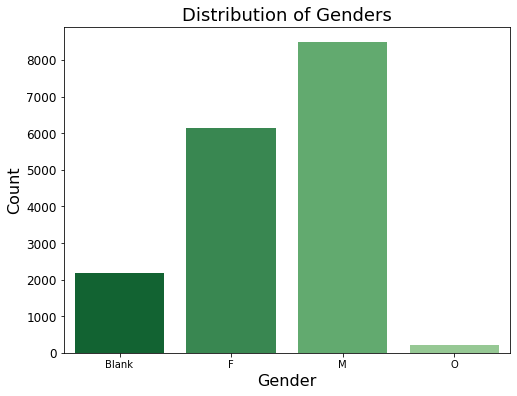

In [30]:
plt.figure(figsize = (8,6))
sns.countplot(data=profile,x='gender_modified')
plt.title('Distribution of Genders', size = 18)
plt.ylabel('Count', size = 16)
plt.xlabel('Gender', size = 16)
plt.yticks(size = 12)
plt.savefig('./images/gender_dist.png');

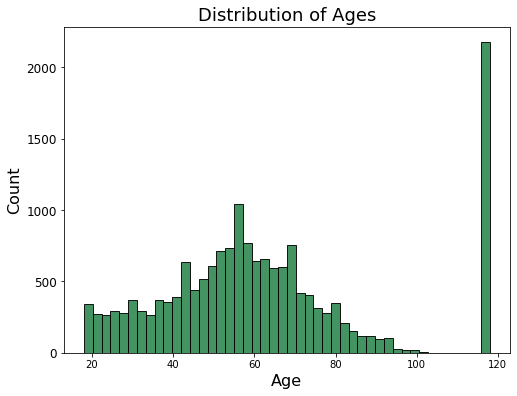

In [31]:
plt.figure(figsize = (8,6))
sns.histplot(data=profile,x='age')
plt.title('Distribution of Ages', size = 18)
plt.ylabel('Count', size = 16)
plt.xlabel('Age', size = 16)
plt.yticks(size = 12);

Pretty significant outlier at 118 years old - these all correspond with the NaNs we saw in the gender column.

In [32]:
# Fix outlier in Age
profile[profile['age']==118]['gender'].value_counts()

Series([], Name: gender, dtype: int64)

In [33]:
# Imputing with random sampling of age to maintain distribution
profile['age_modified'] = profile['age'].apply(lambda x: np.random.choice(profile[profile['age'] != 118]['age']) 
                                               if x == 118 else x)

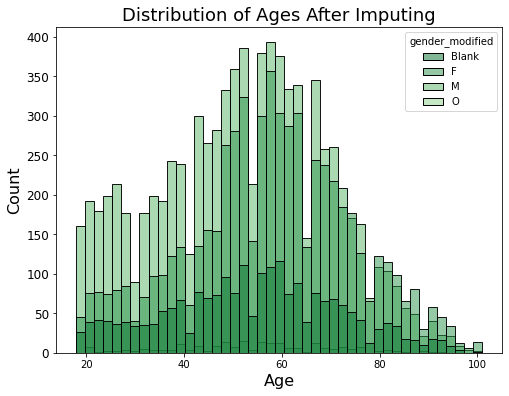

In [34]:
plt.figure(figsize = (8,6))
sns.histplot(data=profile,x='age_modified', hue='gender_modified')
plt.title('Distribution of Ages After Imputing', size = 18)
plt.ylabel('Count', size = 16)
plt.xlabel('Age', size = 16)
plt.yticks(size = 12)
plt.savefig('./images/age_gender_dist.png');

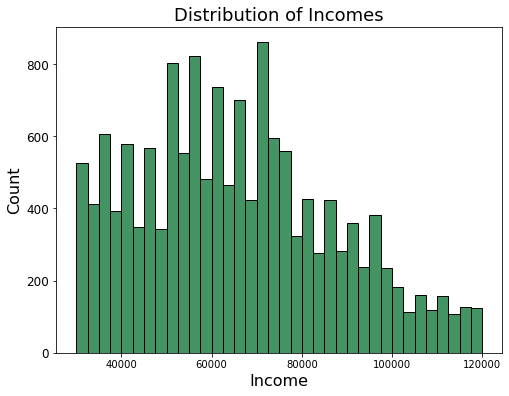

In [35]:
plt.figure(figsize = (8,6))
sns.histplot(data=profile,x='income')
plt.title('Distribution of Incomes', size = 18)
plt.ylabel('Count', size = 16)
plt.xlabel('Income', size = 16)
plt.yticks(size = 12);

In [36]:
# Income nulls also correspond with the age outlier and gender NaNs
profile[profile['income'].isnull()].groupby('gender').count()['income']

Series([], Name: income, dtype: int64)

In [37]:
# Impute empty incomes with random sampling of non null values
profile['income_modified']= profile['income'].apply(
    lambda x: np.random.choice(profile['income'].dropna().values) if np.isnan(x) else x).astype(int)

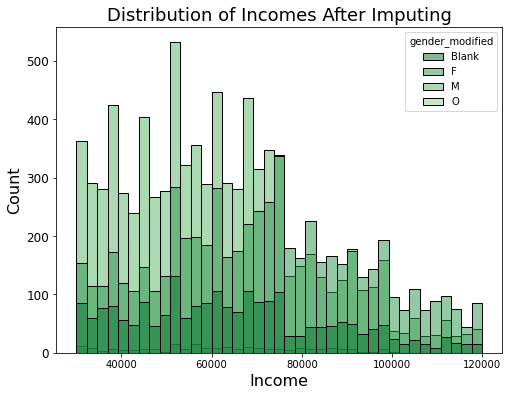

In [38]:
plt.figure(figsize = (8,6))
sns.histplot(data=profile,x='income_modified', hue='gender_modified')
plt.title('Distribution of Incomes After Imputing', size = 18)
plt.ylabel('Count', size = 16)
plt.xlabel('Income', size = 16)
plt.yticks(size = 12)
plt.savefig('./images/income_gender_dist.png');

In [39]:
final_profile = profile.drop(columns = ['gender', 'age', 'income', 'year', 'month', 'day'])

In [40]:
profile.describe()

,age,income,year,month,membership_days,age_modified,income_modified
count,17000.000000,14825.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,62.531412,65404.991568,2016.635000,6.683529,518.449882,54.351118,65343.470588
std,26.738580,21598.299410,1.177624,3.487098,411.223904,17.397850,21603.137260
min,18.000000,30000.000000,2013.000000,1.000000,1.000000,18.000000,30000.000000
25%,45.000000,49000.000000,2016.000000,4.000000,209.000000,42.000000,49000.000000
50%,58.000000,64000.000000,2017.000000,7.000000,359.000000,55.000000,64000.000000
75%,73.000000,80000.000000,2017.000000,10.000000,792.000000,66.000000,79000.000000
max,118.000000,120000.000000,2018.000000,12.000000,1824.000000,101.000000,120000.000000


Max age is now 101, min age is 18.

In [41]:
# Loop over labels and encode with numeric values
labels_dict = dict()
start=0

for label in final_profile['id']:
    if label not in labels_dict:
        labels_dict[label] = start
        start += 1

# Map label keys in 'id' with their values in 'labels_dict'
final_profile['id'] = final_profile['id'].apply(lambda x: labels_dict[x])

final_profile['id'].head()

0    0
1    1
2    2
3    3
4    4
Name: id, dtype: int64

In [42]:
# Rename 'id' to 'customer_id' and other modified columns just for more clarity
final_profile.rename(columns={'id': 'customer_id', 
                        'gender_modified': 'gender',
                        'age_modified': 'age',
                        'income_modified': 'income'}, inplace=True)
final_profile.head()

,customer_id,membership_days,gender,age,income
0,0,530,Blank,23,56000
1,1,377,F,55,112000
2,2,15,Blank,89,68000
3,3,444,F,75,100000
4,4,357,Blank,82,88000


In [43]:
# Make sure there aren't any duplicate customer profiles(rows)
len(np.unique(final_profile['customer_id'])) == len(final_profile)

True

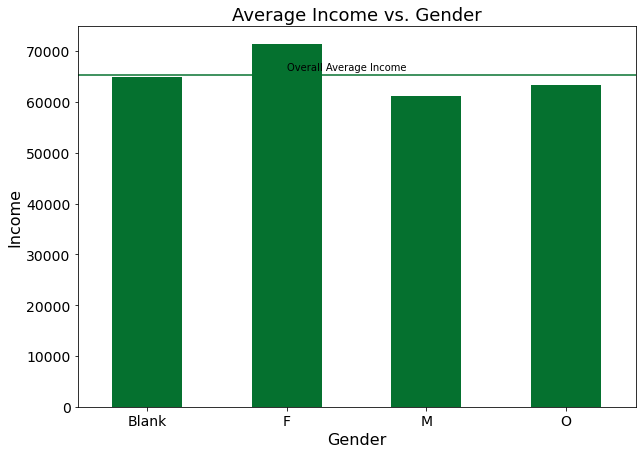

In [44]:
mean_income = final_profile['income'].mean()
gender_income = final_profile.groupby('gender', as_index=False).agg({'income':'mean'})
gender_income.plot(kind = 'bar', x = 'gender', y = 'income', legend=False, figsize=(10,7))
plt.hlines(mean_income, -100 , 1000)
plt.ylabel('Income', size = 16)
plt.xlabel('Gender', size = 16)
plt.title('Average Income vs. Gender', size = 18)
plt.xticks(rotation = 0, size = 14)
plt.yticks(size = 14)
plt.text(1, mean_income + 1000, 'Overall Average Income')
plt.savefig('./images/income_gender.png');

In [45]:
# Dummify gender - keep all gender types for clustering
final_profile = pd.get_dummies(final_profile, columns=['gender'])

**Observations:**
- 'became_member_on' changed to a datetime data type
- 'age' had 2175 outliers of age 118. These were all from the NaN gender group and NaN incomes- imputed using the avg age of the 'O' gender group
- 'gender' had 2175 NaNs I imputed with the 'O' group
- 'income' also had 2175 NaNs so I imputed using the avg income of the 'O' gender group
- profile['id'] == transcript['person']
- Need to one hot encode 'gender', 'year', 'month', 'day'
- The majority of customers in the dataset are male.
- Data for 2018 isn't a full year which is why it's lower than total new memberships for 2017.

# Transcript Dataset
Records show the different statuses of the promotional offers that a customer received, for example offer_received, offer_viewed, offer_completed in addition to the transactions for each customer. 

In [46]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [47]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [48]:
transcript.tail()

,person,event,value,time
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714
306533,c02b10e8752c4d8e9b73f918558531f7,transaction,{'amount': 4.05},714


Transactions and offers in this datatset.

In [49]:
transcript['event'].value_counts(normalize=True)

transaction        0.453304
offer received     0.248837
offer viewed       0.188315
offer completed    0.109544
Name: event, dtype: float64

In [50]:
# transcript['person'] == profile['id']
# Change column name from 'person' to 'id' in order to merge the dataframes later
transcript.rename(columns={'person':'customer_id'}, inplace=True)

In [51]:
# Map 'customer_id' with previously created labels_dict from profile dataset above
transcript['customer_id'] = transcript['customer_id'].apply(lambda x: labels_dict[x])

In [52]:
# Checking we still have the same number of customers for profile and transcript
len(np.unique(transcript['customer_id'])) == len(np.unique(final_profile['customer_id']))

True

In [53]:
# Kept getting error below because 'value' is being read as a string not dictionary
transcript['value'].apply(type).head()

0    <class 'str'>
1    <class 'str'>
2    <class 'str'>
3    <class 'str'>
4    <class 'str'>
Name: value, dtype: object

In [54]:
# Reference: https://stackoverflow.com/questions/39169718/convert-string-to-dict-then-access-keyvalues-how-to-access-data-in-a-class
transcript['value'] = transcript['value'].astype('str')
transcript['value'] = transcript['value'].apply(lambda x: ast.literal_eval(x))
transcript = transcript.apply(pd.Series)

# Extract out just the actual 'offer_id' and 'amount' from 'value' column
transcript['value_type'] = transcript['value'].map(lambda x: list(x.keys())[0])
transcript['value'] = transcript['value'].map(lambda x: list(x.values())[0])
transcript.tail()

,customer_id,event,value,time,value_type
306529,16959,transaction,1.59,714,amount
306530,16964,transaction,9.53,714,amount
306531,16979,transaction,3.61,714,amount
306532,16987,transaction,3.53,714,amount
306533,16994,transaction,4.05,714,amount


In [55]:
transcript.head()

,customer_id,event,value,time,value_type
0,3,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,offer id
1,4,offer received,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,offer id
2,5,offer received,2906b810c7d4411798c6938adc9daaa5,0,offer id
3,6,offer received,fafdcd668e3743c1bb461111dcafc2a4,0,offer id
4,7,offer received,4d5c57ea9a6940dd891ad53e9dbe8da0,0,offer id


### Split out transactions from offers
'value' now either has the transaction amount or the offer_id

In [56]:
# Split transcript into separate offers and transactions
offers = transcript[transcript['event'] != 'transaction']
transactions = transcript[transcript['event'] == 'transaction']

# Rename columns
offers.rename(columns={'value': 'offer_id'}, inplace=True)
transactions.rename(columns={'value': 'amount'}, inplace=True)

# Drop unnecessary columns
offers.drop(columns='value_type', inplace=True)
transactions.drop(columns=['value_type', 'event'], inplace=True)

/Users/emilysiegel/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/Users/emilysiegel/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [57]:
transactions.head()

,customer_id,amount,time
12654,41,0.83,0
12657,55,34.56,0
12659,63,13.23,0
12670,134,19.51,0
12671,151,18.97,0


In [58]:
# amount should be a float not object now
transactions['amount'] = transactions['amount'].astype(float)
transactions.dtypes

<ipython-input-58-1c78f1e41792>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['amount'] = transactions['amount'].astype(float)


customer_id      int64
amount         float64
time             int64
dtype: object

In [59]:
offers.head()

,customer_id,event,offer_id,time
0,3,offer received,9b98b8c7a33c4b65b9aebfe6a799e6d9,0
1,4,offer received,0b1e1539f2cc45b7b9fa7c272da2e1d7,0
2,5,offer received,2906b810c7d4411798c6938adc9daaa5,0
3,6,offer received,fafdcd668e3743c1bb461111dcafc2a4,0
4,7,offer received,4d5c57ea9a6940dd891ad53e9dbe8da0,0


In [60]:
# Simplify offer_id to match the portfolio['offer_id']
offers['offer_id'] = offers['offer_id'].replace({'ae264e3637204a6fb9bb56bc8210ddfd': 1, 
                                                 '4d5c57ea9a6940dd891ad53e9dbe8da0': 2,
                                                 '3f207df678b143eea3cee63160fa8bed': 3,
                                                 '9b98b8c7a33c4b65b9aebfe6a799e6d9': 4,
                                                 '0b1e1539f2cc45b7b9fa7c272da2e1d7': 5,
                                                 '2298d6c36e964ae4a3e7e9706d1fb8c2': 6,
                                                 'fafdcd668e3743c1bb461111dcafc2a4': 7,
                                                 '5a8bc65990b245e5a138643cd4eb9837': 8,
                                                 'f19421c1d4aa40978ebb69ca19b0e20d': 9,
                                                 '2906b810c7d4411798c6938adc9daaa5': 10})

offers.head()

<ipython-input-60-d904ab8f3fa3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offers['offer_id'] = offers['offer_id'].replace({'ae264e3637204a6fb9bb56bc8210ddfd': 1,


,customer_id,event,offer_id,time
0,3,offer received,4,0
1,4,offer received,5,0
2,5,offer received,10,0
3,6,offer received,7,0
4,7,offer received,2,0


In [61]:
# Final check to make sure no nulls and data types are correct
offers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167581 entries, 0 to 306527
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  167581 non-null  int64 
 1   event        167581 non-null  object
 2   offer_id     167581 non-null  int64 
 3   time         167581 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ MB


In [62]:
# Final check to make sure no nulls and data types are correct
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138953 entries, 12654 to 306533
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   customer_id  138953 non-null  int64  
 1   amount       138953 non-null  float64
 2   time         138953 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 4.2 MB


**Observations:**
- 'time' convert to days possibly?
- transcript['person'] == profile['customer_id']
- 'offer_id' in transcript['value'] == portfolio['offer_id']
- 'value' is a dict of strings - either an offer id or transaction amount depending on the record. From 'value' extracted out just the actual 'offer_id' and 'amount'
- Need to one hot encode 'event', 'offer_id_modified'
- The offer_id can have the offer_recieved, offer_reviewed, and the offer_compelted.

# Save Cleaned Files

In [63]:
final_portfolio.to_csv('./data/portfolio_clean.csv', index = False)
final_profile.to_csv('./data/profile_clean.csv', index = False)
transactions.to_csv('./data/transactions_clean.csv', index = False)
offers.to_csv('./data/offers_clean.csv', index = False)

# More EDA

In [64]:
# Check repeat offers for the same customer
offers[offers.duplicated(subset=['offer_id', 'customer_id'], keep=False)].sort_values(by = 'customer_id').head(15)

,customer_id,event,offer_id,time
130147,0,offer viewed,5,348
245122,0,offer received,7,576
110828,0,offer received,5,336
237365,0,offer completed,7,552
85290,0,offer viewed,10,216
262137,0,offer viewed,7,582
214274,0,offer viewed,6,504
201570,0,offer received,6,504
150596,0,offer received,7,408
237366,0,offer completed,6,552


There can be duplicate offer instances for the different events for the same customer_id - offer received, offer viewed and offer_completed events

In [65]:
# Create a time group column and bin by certain ranges of days
offers['time_group'] = pd.cut(x=offers['time'], bins=[0, 100, 200, 300, 400, 500,600,700,800], include_lowest=True,
                    labels=['0-100 days', '100-200 days', '200-300 days', '300-400 days', '400-500 days', 
                            '500-600 days', '600-700 days', '700-800 days'])

transactions['time_group'] = pd.cut(x=transactions['time'], bins=[0, 100, 200, 300, 400, 500,600,700,800], include_lowest=True,
                    labels=['0-100 days', '100-200 days', '200-300 days', '300-400 days', '400-500 days', 
                            '500-600 days', '600-700 days', '700-800 days'])

<ipython-input-65-64d549172952>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offers['time_group'] = pd.cut(x=offers['time'], bins=[0, 100, 200, 300, 400, 500,600,700,800], include_lowest=True,
<ipython-input-65-64d549172952>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions['time_group'] = pd.cut(x=transactions['time'], bins=[0, 100, 200, 300, 400, 500,600,700,800], include_lowest=True,


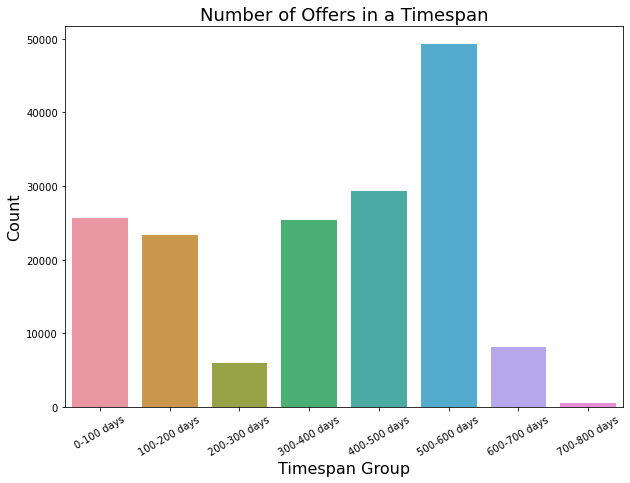

In [66]:
fig = plt.figure(figsize = (10,7))
sns.countplot(x='time_group',data=offers)
plt.xticks(rotation=30)
plt.title('Number of Offers in a Timespan', size = 18)
plt.xlabel('Timespan Group', size = 16)
plt.ylabel('Count', size = 16)
plt.savefig('./images/offers_timespan.png');

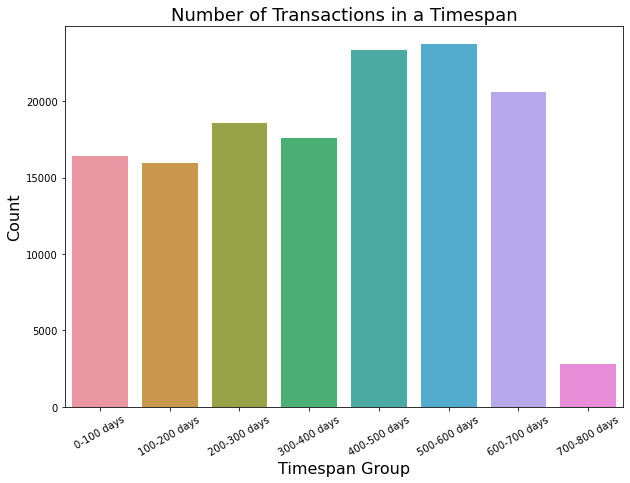

In [67]:
fig = plt.figure(figsize = (10,7))
sns.countplot(x='time_group',data=transactions)
plt.xticks(rotation=30)
plt.title('Number of Transactions in a Timespan', size = 18)
plt.xlabel('Timespan Group', size = 16)
plt.ylabel('Count', size = 16);
plt.savefig('./images/transactions_timespan.png');

In [68]:
# Create new age_group column by binning Age into different groups
profile['age_group'] = pd.cut(x=final_profile['age'], bins=[18, 20, 40, 60, 80, 101],
                    labels=['Youth(0-19)', 'Young_Adult(20-39)', 'Middle-Age(40-59)',
                            'Senior(60-79)', 'Geriatric(80-100)'], include_lowest=True)

profile['age_group'].value_counts(normalize=True)

Middle-Age(40-59)     0.404765
Senior(60-79)         0.303765
Young_Adult(20-39)    0.201235
Geriatric(80-100)     0.067529
Youth(0-19)           0.022706
Name: age_group, dtype: float64

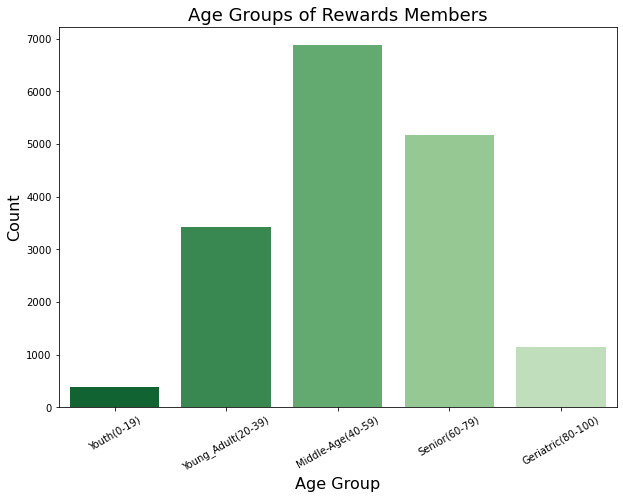

In [69]:
fig = plt.figure(figsize = (10,7))
sns.countplot(x='age_group',data=profile)
plt.xticks(rotation=30)
plt.title('Age Groups of Rewards Members', size = 18)
plt.xlabel('Age Group', size = 16)
plt.ylabel('Count', size = 16)
plt.savefig('./images/age_groups.png');

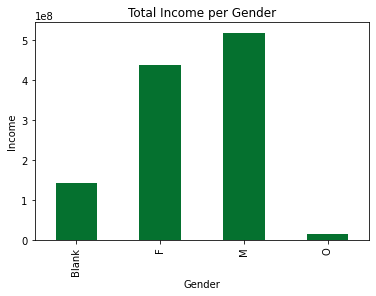

In [70]:
profile.groupby('gender_modified').sum()['income_modified'].plot(kind='bar')
plt.title('Total Income per Gender')
plt.ylabel('Income')
plt.xlabel('Gender');

Total income for Males is higher even though the number of females in with the highest incomes is larger.

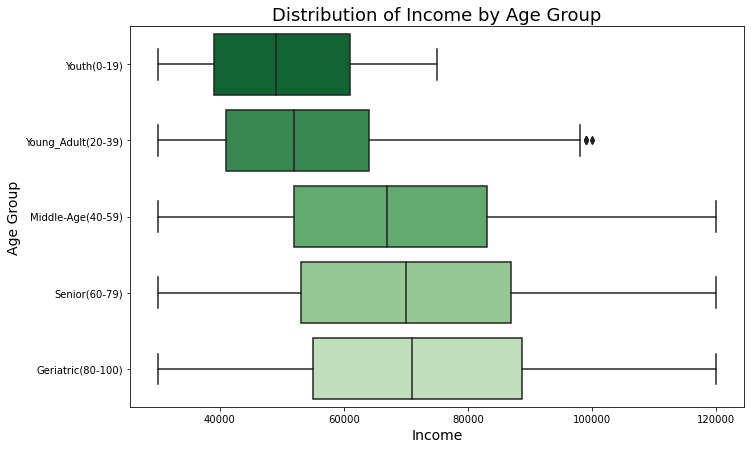

In [71]:
plt.figure(figsize=(11,7))
sns.boxplot(x="income", y= "age_group", data = profile)
plt.title('Distribution of Income by Age Group', size = 18) 
plt.xlabel('Income', size = 14)
plt.ylabel('Age Group', size = 14)
plt.savefig('./images/income_dist_age_group.png');